In [1]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

In [2]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
df.drop(["Channel", "Region"], axis=1, inplace=True)

In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)

In [12]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2, tol=0.01, random_state=0).fit_predict(X)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
df["clusters"] = clusters.tolist()

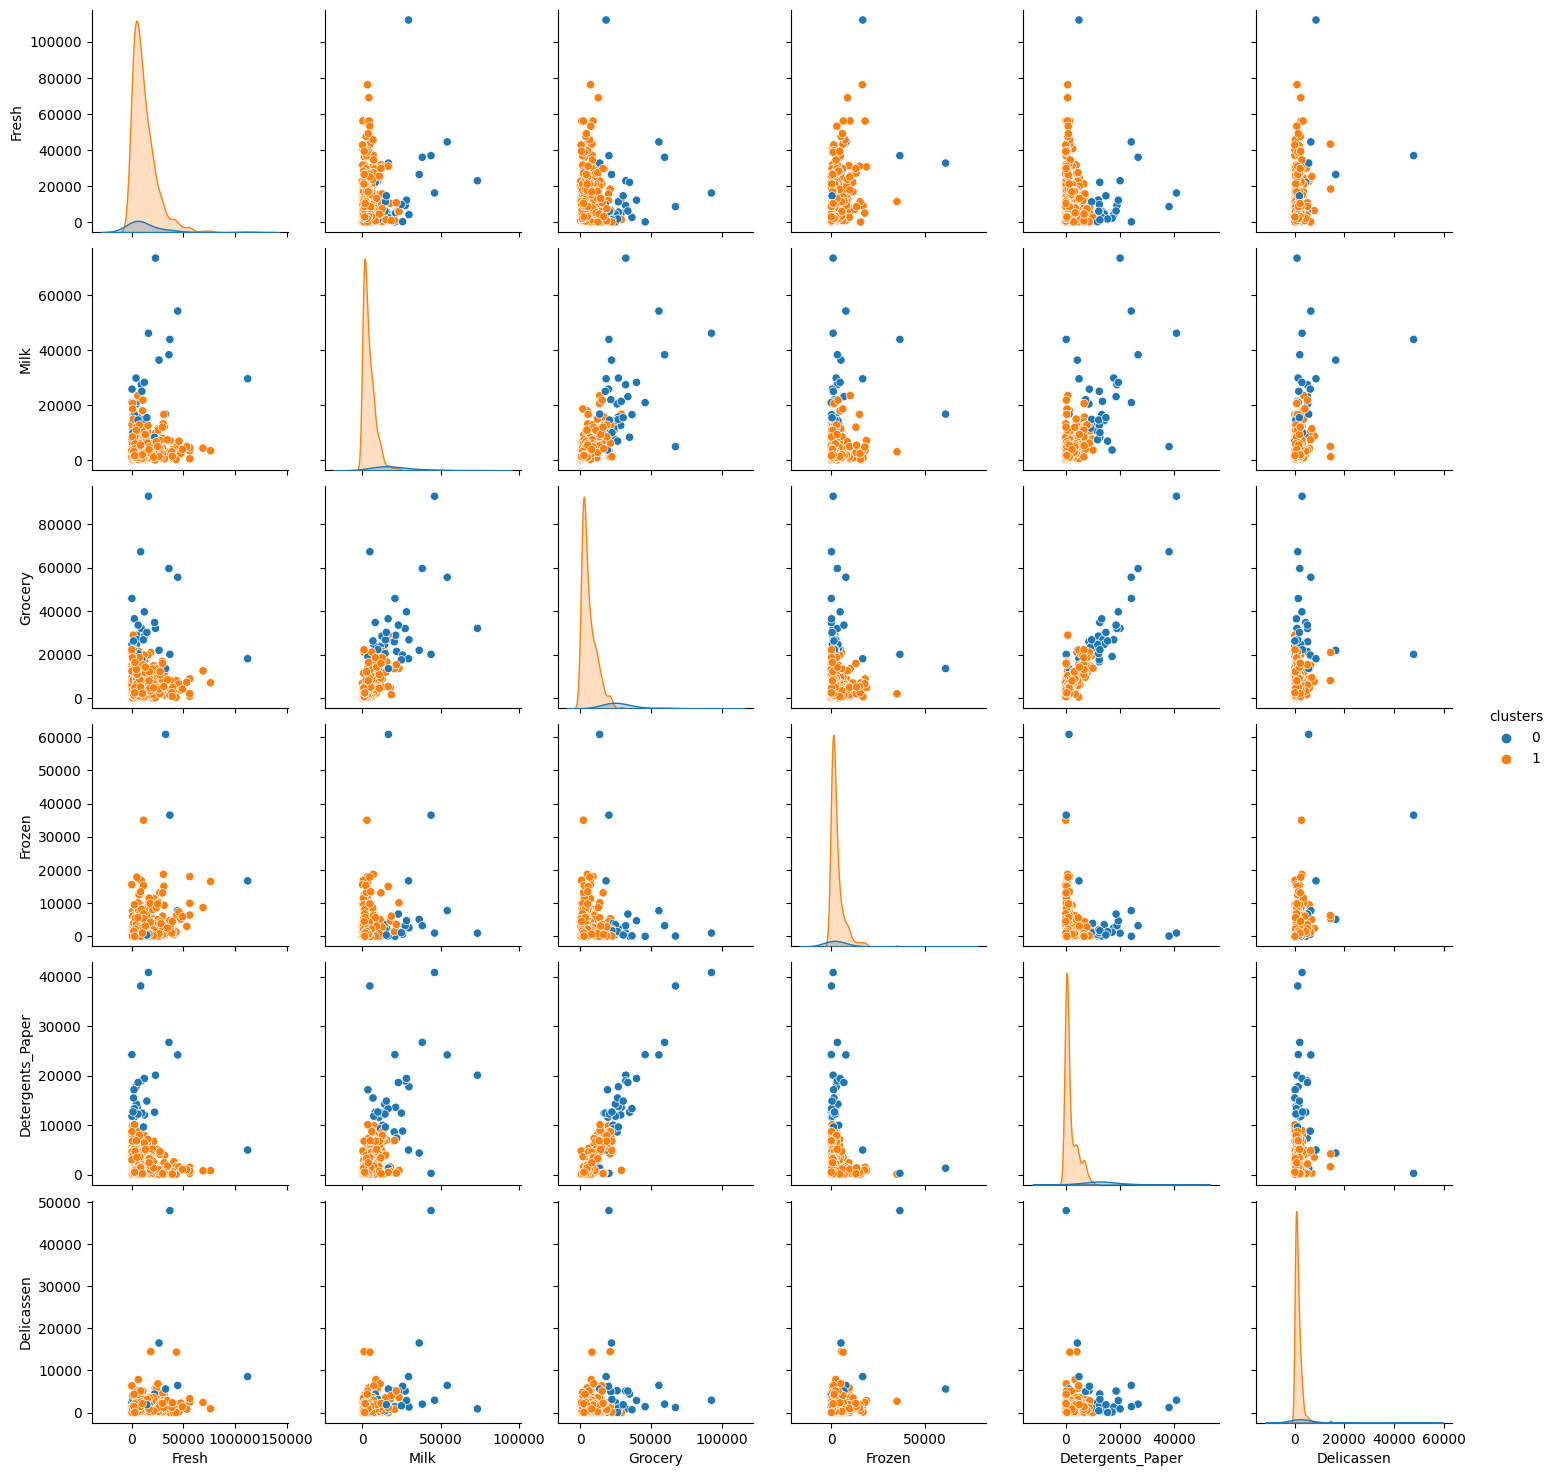

In [16]:
import seaborn as sn

sn.pairplot(df, hue="clusters")

In [17]:
distortions = []
spread = range(1, 26)

for k in spread:
    model = KMeans(n_clusters=k, tol=0.01, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)
    
print(distortions)
    

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is k

[2640.0, 1954.6477611552875, 1614.5183504384179, 1317.5042090087509, 1059.5857524756698, 918.0892915754794, 832.8351864525389, 742.2687719037792, 656.082594419187, 606.0618639631278, 567.4564937546724, 527.5243086235841, 491.13986113950256, 454.3823630721047, 429.3084111915113, 415.9883199138159, 384.65228347496145, 365.9053299219675, 335.2386456791501, 327.4428803637738, 314.1288071197481, 296.42071135447515, 284.0703146579375, 266.03859496540855, 259.11701240820815]


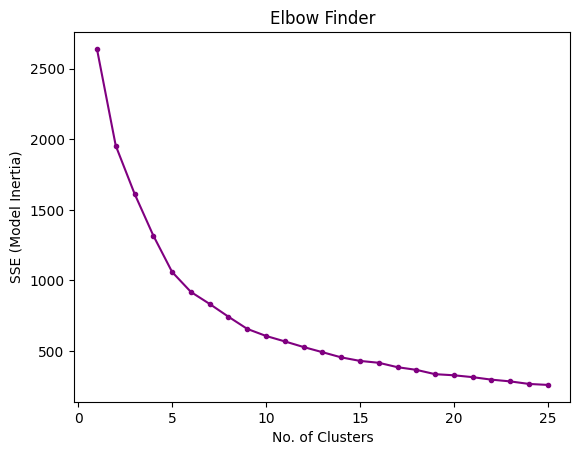

In [18]:
import matplotlib.pyplot as plt

plt.plot(spread, distortions, marker = ".", c="purple")
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

In [26]:
clusters = KMeans(n_clusters=5, tol=0.01, random_state=0).fit_predict(X)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [27]:
df["clusters_optimized"] = clusters.tolist()

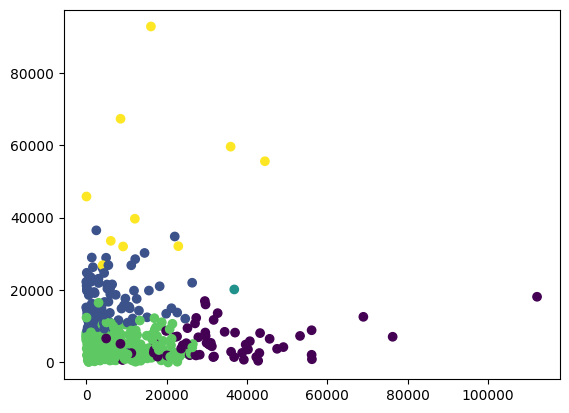

In [28]:
plt.scatter(df["Fresh"], df["Grocery"], c=df.clusters_optimized)

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=5, linkage="ward")

clusters = agg_cluster.fit_predict(X)

In [30]:
df["clusters_agg"] = clusters.tolist()

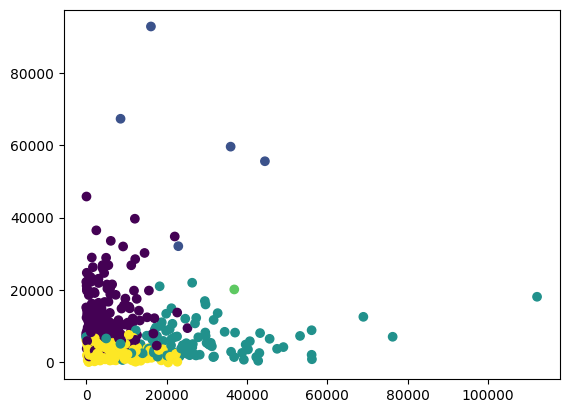

In [31]:
plt.scatter(df["Fresh"], df["Grocery"], c=df.clusters_agg)